# Facemap 1.0 - Keypoints model refinement in colab using a GPU

Facemap is a framework for predicting neural activity from mouse orofacial movements tracked using a pose estimation model. Package also includes singular value decomposition (SVD) of behavioral videos.

***Facemap code: Carsen Stringer & Atika Syeda***

[Link to Paper](https://www.biorxiv.org/content/10.1101/2022.11.03.515121v1)

Github Repo: https://github.com/MouseLand/facemap

This tutorials shows how to refine keypoints and finetune model using Facemap. For more information on the Pose class see [here](https://github.com/MouseLand/facemap/blob/main/facemap/pose/pose.py)

<a href="https://colab.research.google.com/github/MouseLand/facemap/blob/dev/notebooks/refine_keypoints_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

We will first install Facemap, check the GPU is working, and mount google drive to access videos.

## Configuration and Installation

Make sure you have GPU access enabled by going to Edit -> Notebook settings -> Hardware accelerator and selecting GPU



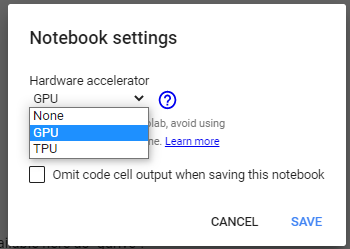

Install Facemap -- by default the torch GPU version is installed in COLAB notebook.

In [ ]:
!pip install facemap[gui]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.0/961.0 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.6 MB/s eta 0:00:00


Check CUDA version and that GPU is working.

In [ ]:
!nvcc --version
!nvidia-smi

import os, torch
import numpy as np
from facemap.pose import pose
from glob import glob

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
Thu Jul 13 20:25:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |       

## Mount google drive

Please mount your google drive.

In [ ]:
#@markdown ###Run this cell to connect your Google Drive to Colab

#@markdown * Click on the URL.

#@markdown * Sign in your Google Account.

#@markdown * Copy the authorization code.

#@markdown * Enter the authorization code.

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

#mounts user's Google Drive to Google Colab.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###**How to get google drive path to your video(s)**

The above step allows this colab notebook to access your files from google drive. Now, you need the path of your folder containing the video(s). On the left of your notebook you will see a file icon. Click on the icon and it will give you:

![image.png]( 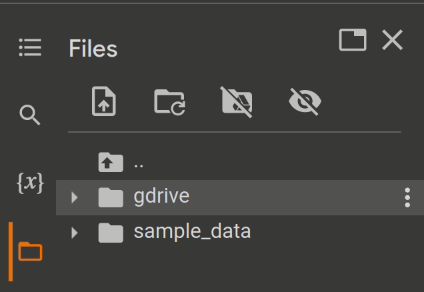)

Your Google drive is under "gdrive". Click on the triangle icon on left of gdrive and it will be a dropdown view of your whole drive. Navigate to the folder containing your images. Once you are there, click on the three dots and select "Copy Path"

![image.png]( 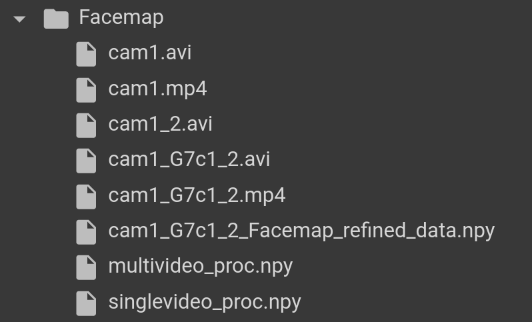)

## Fine-tune model using refined keypoints data

### Load data

In [ ]:
#@markdown ###Enter directory path to video:
video_path = "/content/gdrive/MyDrive/Facemap/cam1_G7c1_2.avi" #@param {type:"string"}

#@markdown ###### File extension must be one of: *.mp4 *.avi *.mj2 *.mkv *.mpeg *.mpg *.asf *m4v

Next, load refined keypoints data generated using the Facemap GUI. Upload data on gdrive or refining Facemap keypoints model in this colab notebook. For more details on how to use the GUI for saving refined keypoints data, [check out the tutorial](https://github.com/MouseLand/facemap/blob/main/docs/pose_tracking_gui_tutorial.md#finetune-model-to-refine-keypoints-for-a-video).

In [ ]:
#@markdown ###Enter directory path to refined keypoints data:
refined_data_path = "/content/gdrive/MyDrive/Facemap/cam1_G7c1_2_Facemap_refined_data.npy" #@param {type:"string"}

#@markdown ###### File extension must be *.npy

In [ ]:
#@markdown ###Set parameters
epochs = "36" #@param {type:"string"}
batch_size = "1" #@param {type:"string"}
learning_rate = "1e-4" #@param {type:"string"}
weight_decay = "0" #@param {type:"string"}
model_output_path = "/home/stringlab/" #@param {type:"string"}
refined_model_name = "refined_model" #@param {type:"string"}
#@markdown ###### Note: epochs and batch_size should be int, learning_rate and weight_decay can be float

In [ ]:
#@markdown ### Train model
# Initialize pose model.
model = pose.Pose(filenames=[[video_path]])
model.pose_prediction_setup()
# Train model
model.net = model.train(
                image_data,
                keypoints_data,
                int(epochs),
                int(batch_size),
                int(batch_size),
                int(weight_decay),
                dat['bbox'])
# Save refined model
torch.save(model.net.state_dict(), os.path.join(model_output_path, refined_model_name + '.pth'))
print("Saved refined model to: ", os.path.join(model_output_path, refined_model_name + '.pth'))

## Use refined keypoints model

Follow the instructions below to load the refined model in GUI for processing keypoints: